## Imports

In [1]:
from scipy.optimize import OptimizeResult
from helpers import *

## Golden section search

In [2]:
def golden_section_search(f, a, b, tol=1e-6, max_iter=1000):
    golden_ratio = (np.sqrt(5) - 1) / 2

    nfev = 1

    x1 = b - golden_ratio * (b - a)
    x2 = a + golden_ratio * (b - a)
    f1 = f(x1)
    f2 = f(x2)

    nfev += 2

    for nit in range(max_iter):
        if f1 > f2:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + golden_ratio * (b - a)
            f2 = f(x2)
            nfev += 1
        else:
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - golden_ratio * (b - a)
            f1 = f(x1)
            nfev += 1

        if abs(b - a) < tol:
            break

    x_min = (a + b) / 2
    nfev += 1

    result = OptimizeResult(
        x=x_min,
        nfev=nfev
    )

    return result

## Newton's method with line search using golden section search

In [3]:
def newton_method(f, grad_f, x0, tol=1e-6, max_iter=1000):
    x = np.array(x0, dtype=float)

    eps = np.sqrt(np.finfo(float).eps)

    nit = 0
    nfev = 1
    njev = 0
    x_history = [x.copy()]

    for nit in range(max_iter):
        g = grad_f(x)
        njev += 1

        if np.linalg.norm(g) < tol:
            break

        n = len(x)
        H = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                x_i_plus = x.copy()
                x_i_plus[i] += eps
                x_j_plus = x.copy()
                x_j_plus[j] += eps
                x_ij_plus = x.copy()
                x_ij_plus[i] += eps
                x_ij_plus[j] += eps

                H[i, j] = (f(x_ij_plus) - f(x_i_plus) - f(x_j_plus) + f(x)) / (eps * eps)
                nfev += 4

        H = (H + H.T) / 2

        try:
            p = -np.linalg.pinv(H) @ g
        except np.linalg.LinAlgError:
            p = -g

        if np.dot(p, g) > 0:
            p = -g

        def f_along_line(alpha):
            return f(x + alpha * p)

        alpha_result = golden_section_search(f_along_line, 0, 1.0)
        alpha = alpha_result.x
        nfev += alpha_result.nfev

        x_new = x + alpha * p
        x_history.append(x_new.copy())

        if np.linalg.norm(x_new - x) < tol:
            x = x_new
            nfev += 1
            break

        x = x_new
        nfev += 1

    fun = f(x)

    result = OptimizeResult(
        x=x,
        fun=fun,
        nfev=nfev,
        njev=njev,
        nit=nit + 1,
        x_history=np.array(x_history)
    )

    return result

# 1. Symmetrical parabola

Method: Newton's Method
Initial point: [-5, 3]
Real minimum: [3, -2]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-5.000, 3.000)       89.000        1             52         9.433981  


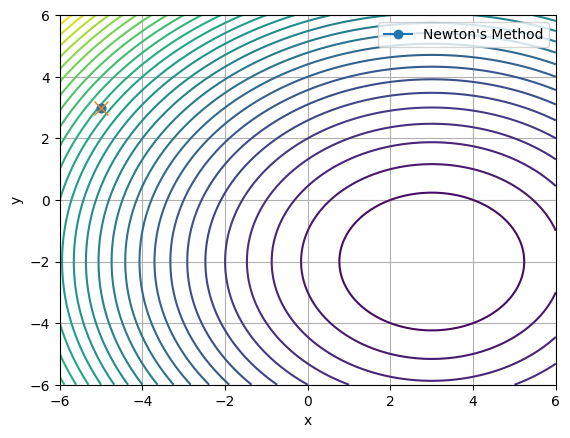

In [4]:
print_output([-5, 3], newton_method, func_sp, grad_sp, [3, -2], label="Newton's Method")

# 2. Rotated elliptical function

Method: Newton's Method
Initial point: [-3, -25]
Real minimum: [-18, 16]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-3.000, -25.000)       2825.000      1             52         43.657760 


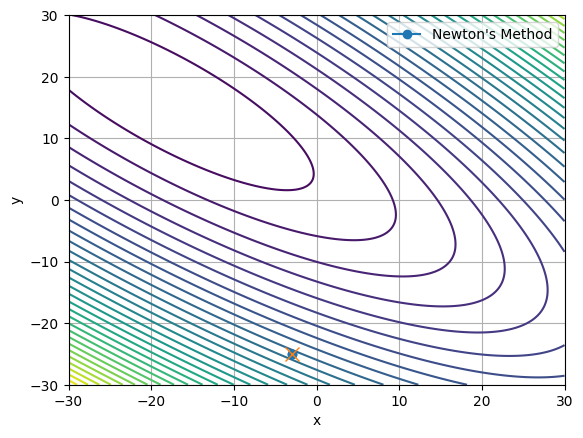

In [5]:
print_output([-3, -25], newton_method, func_re, grad_re, [-18, 16], label="Newton's Method", grid=[-30, 30])


# 3. Elliptical function with scale

Method: Newton's Method
Initial point: [-5, 3]
Real minimum: [3, -1]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-5.000, 3.000)       528.000       1             52         8.944272  


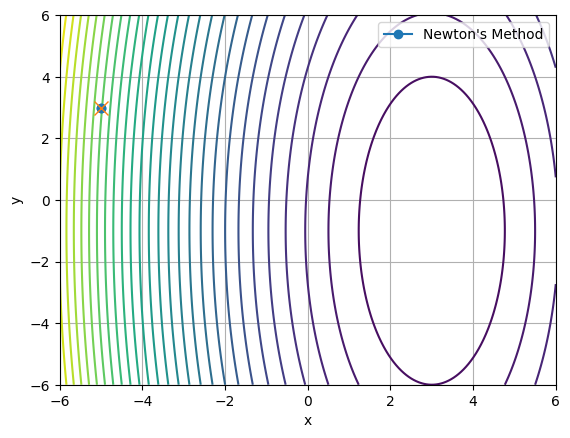

In [6]:
print_output([-5, 3], newton_method, func_es, grad_es, [3, -1], label="Newton's Method")


# 4. Rastrigin function (more challenging multimodal function)


Method: Newton's Method
Initial point: [4, 4]
Real minimum: [0, 0]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (1.897, -0.000)       3.801         9             460        1.896830  


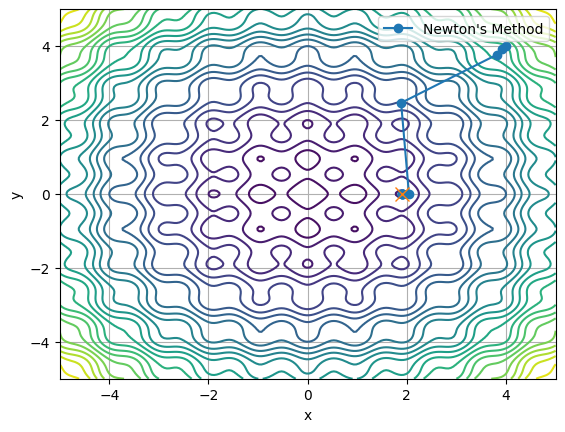

In [7]:
print_output([4, 4], newton_method, rastrigin, grad_rastrigin, [0, 0], label="Newton's Method", grid=[-5, 5])